<a href="https://colab.research.google.com/github/Adrianus-Bagas/Chatbot-Sederhana/blob/main/Simple_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chatbot Sederhana

## 1. Import libraries

In [1]:
import json 
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Flatten, Conv1D, MaxPooling1D, BatchNormalization,Dropout, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [2]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. Memuat data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/Portofolio/Project #2/intents.json') as file:
    data = json.load(file)

## 3. Praproses Data

In [5]:
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [6]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [7]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

## 4. Model

### a. Neural Network

In [8]:
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(32, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                        

In [9]:
epochs = 500
history = model1.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/500
1/1 [==============================] - 1s 757ms/step - loss: 2.0796 - accuracy: 0.1304
Epoch 2/500
1/1 [==============================] - 0s 11ms/step - loss: 2.0790 - accuracy: 0.1304
Epoch 3/500
1/1 [==============================] - 0s 14ms/step - loss: 2.0785 - accuracy: 0.1304
Epoch 4/500
1/1 [==============================] - 0s 17ms/step - loss: 2.0779 - accuracy: 0.1304
Epoch 5/500
1/1 [==============================] - 0s 14ms/step - loss: 2.0773 - accuracy: 0.1304
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 2.0768 - accuracy: 0.1304
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 2.0761 - accuracy: 0.1304
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 2.0755 - accuracy: 0.1304
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 2.0748 - accuracy: 0.1304
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 2.0742 - accuracy: 0.1304
Epoch 11/500
1/1 [===

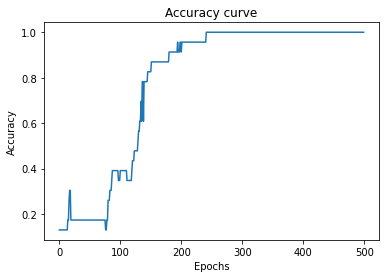

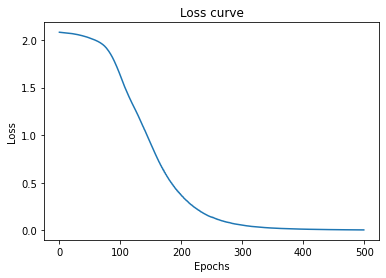

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy curve")
plt.show()
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.show()

### b. CNN

In [11]:
model2=Sequential()
model2.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model2.add(Conv1D(filters=32,kernel_size=3,activation='relu'))
model2.add(BatchNormalization())
model2.add(Conv1D(filters=32,kernel_size=3,activation='relu'))
model2.add(BatchNormalization())
model2.add(Conv1D(filters=32,kernel_size=3,activation='relu'))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 16)            16000     
                                                                 
 conv1d (Conv1D)             (None, 18, 32)            1568      
                                                                 
 batch_normalization (BatchN  (None, 18, 32)           128       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 32)            3104      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 32)           128       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 14, 32)           

In [12]:
epochs = 500
history = model2.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 2.3756 - accuracy: 0.1739
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 1.8529 - accuracy: 0.2609
Epoch 3/500
1/1 [==============================] - 0s 24ms/step - loss: 1.5577 - accuracy: 0.3478
Epoch 4/500
1/1 [==============================] - 0s 20ms/step - loss: 1.3916 - accuracy: 0.5652
Epoch 5/500
1/1 [==============================] - 0s 21ms/step - loss: 1.2666 - accuracy: 0.6957
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - loss: 1.1525 - accuracy: 0.7391
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 1.0472 - accuracy: 0.7826
Epoch 8/500
1/1 [==============================] - 0s 14ms/step - loss: 0.9525 - accuracy: 0.8696
Epoch 9/500
1/1 [==============================] - 0s 14ms/step - loss: 0.8778 - accuracy: 0.8696
Epoch 10/500
1/1 [==============================] - 0s 13ms/step - loss: 0.8119 - accuracy: 0.8696
Epoch 11/500
1/1 [===

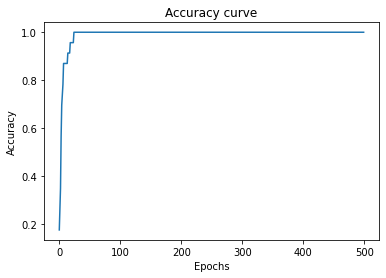

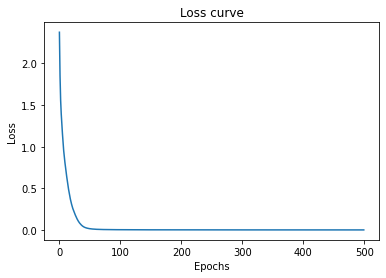

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy curve")
plt.show()
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.show()

### c. LSTM

In [14]:
model3=Sequential()
model3.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model3.add(LSTM(units = 32, activation = 'relu', return_sequences = True))
model3.add(LSTM(units = 32, activation = 'relu', return_sequences = True))
model3.add(LSTM(units = 32, activation = 'relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 16)            16000     
                                                                 
 lstm (LSTM)                 (None, 20, 32)            6272      
                                                                 
 lstm_1 (LSTM)               (None, 20, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
Total params: 40,232
Trainable params: 40,232
Non-trai

In [15]:
epochs = 500
history = model3.fit(padded_sequences, np.array(training_labels), epochs=epochs)

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 2.0794 - accuracy: 0.1304
Epoch 2/500
1/1 [==============================] - 0s 34ms/step - loss: 2.0789 - accuracy: 0.1739
Epoch 3/500
1/1 [==============================] - 0s 32ms/step - loss: 2.0782 - accuracy: 0.1739
Epoch 4/500
1/1 [==============================] - 0s 29ms/step - loss: 2.0775 - accuracy: 0.1739
Epoch 5/500
1/1 [==============================] - 0s 37ms/step - loss: 2.0768 - accuracy: 0.1739
Epoch 6/500
1/1 [==============================] - 0s 32ms/step - loss: 2.0761 - accuracy: 0.1739
Epoch 7/500
1/1 [==============================] - 0s 31ms/step - loss: 2.0754 - accuracy: 0.1739
Epoch 8/500
1/1 [==============================] - 0s 34ms/step - loss: 2.0747 - accuracy: 0.1739
Epoch 9/500
1/1 [==============================] - 0s 42ms/step - loss: 2.0739 - accuracy: 0.1739
Epoch 10/500
1/1 [==============================] - 0s 31ms/step - loss: 2.0731 - accuracy: 0.1739
Epoch 11/500
1/1 [===

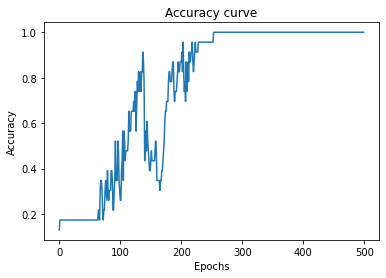

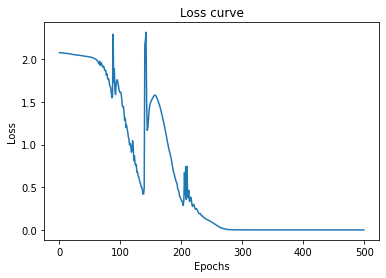

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy curve")
plt.show()
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.show()

## 5. Simulasi Chatbot

In [19]:
# to save the trained model
model3.save("chat_model")

import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open("/content/drive/MyDrive/Colab Notebooks/Portofolio/Project #2/intents.json") as file:
    data = json.load(file)


def chat():
    # load trained model
    model = keras.models.load_model('chat_model')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    max_len = 20
    
    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!
User: hai
ChatBot: Hai, apa kabar ?
User: kamu siapa
ChatBot: Aku Dadang selalu siap melayani pelanggan
User: menu hari ini
ChatBot: Menu makan hari ini adalah sayur kacang panjang, pindang kerang, tempe mendoan, dan telur dadar
User: minum
ChatBot: Menu minuman hari ini ada es teh, es jeruk, teh panas, jeruk panas, dan tentu saja air putih
User: selesai
ChatBot: Untuk pembayaran akan dibantu oleh asisten komputer Mang Iwan yang lain yaitu Asep, silahkan ketik 'Asep' untuk pembayaran
User: asep
ChatBot: Ini tagihan hari ini, untuk pembayaran bisa melalui rekening dan e-money yang tertera pada beranda. Terimakasih
User: terimakasih
ChatBot: Sami-sami
User: dadah
ChatBot: Sampai nanti
User: quit
